# Introductions into using "statsmodels" and "Pandas"

*pandas* has quickly become almost a standard for working with structured data in Python. It often makes code much clearer to
read, and it also offers powerful tools for simple import and export of data.

*statsmodels* is an advanced package for statistical modeling with Python. Here we will only touch the surface of its extensive functionality. A more extensive introduction is available under
http://nbviewer.ipython.org/gist/vincentarelbundock/3485014

Author : Thomas Haslwanter, Oct-2015

In [1]:
# Here I import numpy explicitly, so as to make clear where each function comes from
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as sm
import sys

# "urlopen" is in a different locations in Python2 and Python3
if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen
    
# Show plots inline
%matplotlib inline

## Example: Linear regression fit

In [2]:
# To get reproducable values, I provide a seed value
np.random.seed(987654321)   

# Generate a noisy line
x = np.arange(100)
y = 0.5*x - 20 + np.random.randn(len(x))
df = pd.DataFrame({'x':x, 'y':y})

# Fit a linear model ...
# Note the formula language used to denote the relationship between "x" and "y"
model = sm.ols('y~x', data=df).fit()

# ... and print an extensive summary of the fit results and model properties
print((model.summary()))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.819e+04
Date:                Mon, 30 Nov 2015   Prob (F-statistic):          4.31e-113
Time:                        00:01:32   Log-Likelihood:                -147.60
No. Observations:                 100   AIC:                             299.2
Df Residuals:                      98   BIC:                             304.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -19.9742      0.212    -94.083      0.0

## Example from Altman "Practical statistics for medical research

Here I just show how to bring data into the *pandas* format, and how to use its object oriented notation:

In [3]:
# Get the data from the web
inFile = 'altman_94.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urlopen(url), delimiter=',')

In [4]:
# Bring them into pandas format
lean = pd.Series(data[data[:,1]==1,0])
obese = pd.Series(data[data[:,1]==0,0])

df = pd.DataFrame({'lean':lean, 'obese':obese})



lean      8.066154
obese    10.297778
dtype: float64
There is a significant difference: p = 0.0007989982111700593


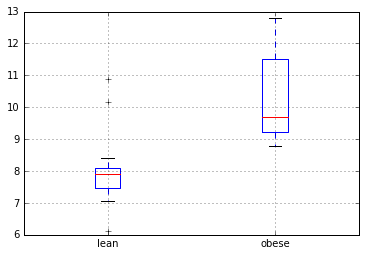

In [5]:
# Calculate the mean, ...
print(df.mean())

# ..., show a boxplot, ...
# Note that by using data-frames, the display can get automatically labelled correctly
# - also for the next plot
df.boxplot(return_type='axes')

# ... and find the p-value:
t, pVal = stats.ttest_ind(lean, obese)
if pVal < 0.05:
    print('There is a significant difference: p = {0}'.format(pVal))